In [1]:
import os
import tools
import numpy as np
import pandas as pd
import scanpy as sc

sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.2


In [2]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal')

In [3]:
adata = sc.read_h5ad('h5ad/df.fil3_gex.h5ad')
adata

AnnData object with n_obs × n_vars = 916806 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

In [4]:
adata.obsm['X_umap'] = adata.obsm['X_umapafterharmony_rna']

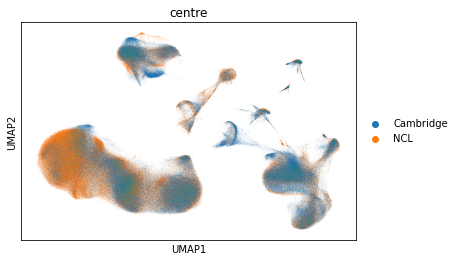

In [5]:
sc.pl.umap(adata, color = 'centre')

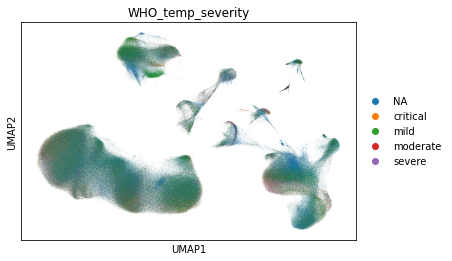

In [6]:
sc.pl.umap(adata, color = 'WHO_temp_severity')

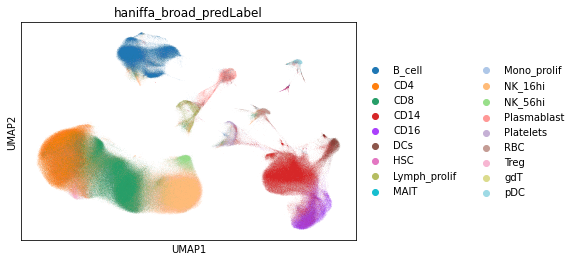

In [7]:
sc.pl.umap(adata, color = 'haniffa_broad_predLabel')

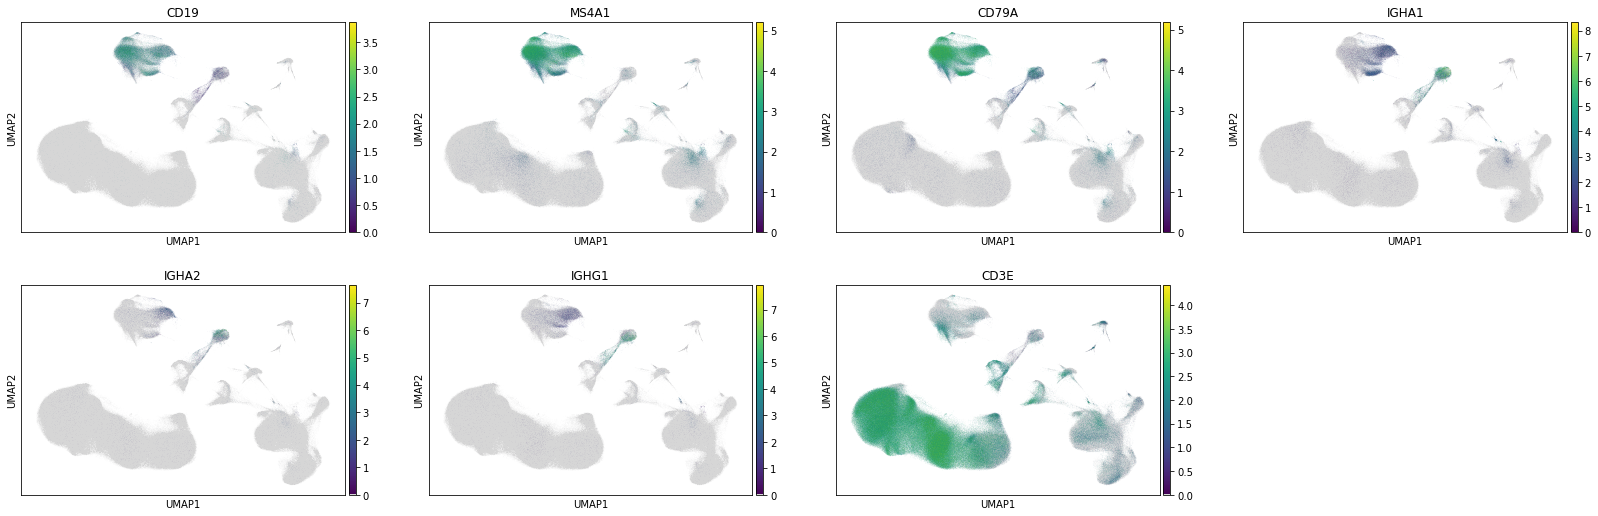

In [8]:
sc.pl.umap(adata, color = ['CD19', 'MS4A1', 'CD79A', 'IGHA1', 'IGHA2', 'IGHG1', 'CD3E'], color_map = tools.cmp())

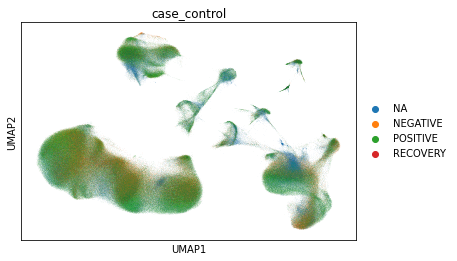

In [9]:
sc.pl.umap(adata, color = 'case_control')

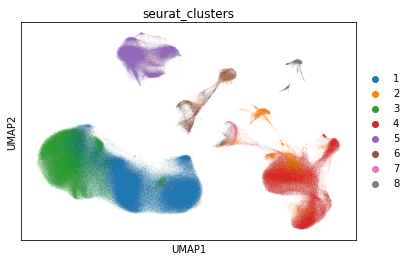

In [10]:
sc.pl.umap(adata, color = 'seurat_clusters')

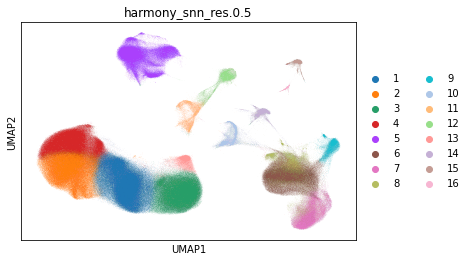

In [11]:
sc.pl.umap(adata, color = 'harmony_snn_res.0.5')

In [12]:
# fix the metadata
meta = pd.read_csv('sc_meta.csv')
meta.head()

sample_id individual_id ethnicity sex  calc_age                  ihd  \
0  C126_3004          C126     asian   M        64                   no   
1   C89_2104           C89     asian   F        70             yes.cabg   
2  C132_1105          C132     asian   F        77             yes.cabg   
3   C60_1604           C60     white   M        80                   no   
4   C23_1504           C23     asian   F        78  yes.no.intervention   

  previous_vte copd diabetes      smoking  ... sample_date temp_WCC temp_neut  \
0           no   no       no        never  ...  30/04/2020      6.4       3.6   
1           no   no   yes.T2  not.current  ...  21/04/2020      NaN       NaN   
2           no   no   yes.T2  not.current  ...  11/05/2020      NaN       NaN   
3           no  yes   yes.T2  not.current  ...  16/04/2020      3.8       2.5   
4           no   no   yes.T2        never  ...  15/04/2020      NaN       NaN   

  temp_mono temp_lymph temp_CRP temp_ddimer temp_ferritin temp_trop  \
0       0.7        1.7      0.6       913.0         200.0      12.0   
1       NaN        NaN      NaN         NaN           NaN       NaN   
2       NaN        NaN      NaN         NaN           NaN       NaN   
3       0.2        0.9     16.8      1005.0        1936.0      35.0   
4       NaN        NaN      NaN         NaN           NaN       NaN   

  WHO_temp_severity  
0              mild  
1               NaN  
2              mild  
3          moderate  
4          moderate  

[5 rows x 30 columns]

In [13]:
adata.obs['individual_id'] = [x.split('_')[0] for x in adata.obs['sample_id']]

... storing 'individual_id' as categorical


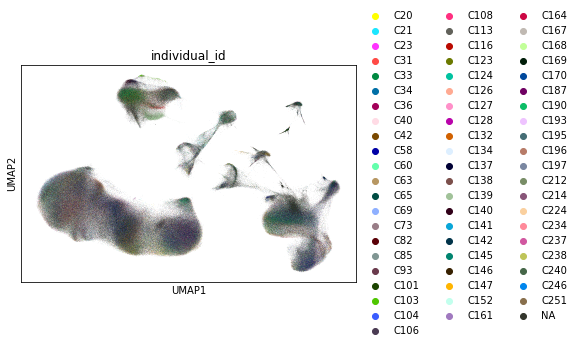

In [14]:
sc.pl.umap(adata, color = 'individual_id')

In [15]:
# create a separate object so that i can use the extract the BCRs
df = adata.obs[~(adata.obs['individual_id'] == 'NA')]
df.shape

(731191, 162)

In [16]:
# df.to_csv('h5ad/df.fil3.kt.metadata_for_bcr.csv')

In [18]:
# !gzip h5ad/df.fil3.kt.metadata_for_bcr.csv

### First look

In [46]:
# subset to B cell looking clusters
bdata = adata[adata.obs['harmony_snn_res.0.5'].isin(['5', '12'])].copy()
bdata

AnnData object with n_obs × n_vars = 111873 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartm

In [47]:
bdata.var['mt'] = bdata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(bdata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

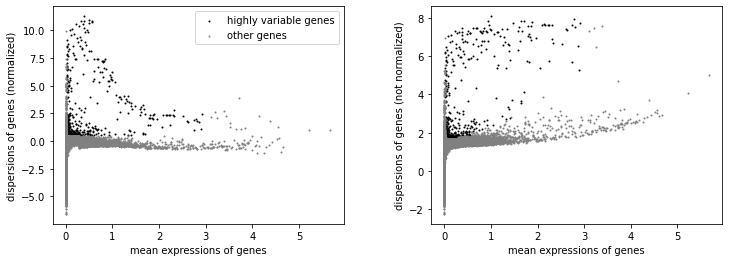

In [48]:
# find highly variable genes
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

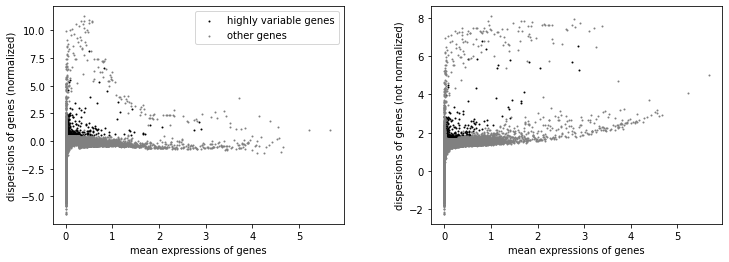

In [49]:
# remove vdj and light chain constant genes from highly variable genes, and also the viral reads
import re
for i in bdata.var.index:
    if re.search('^IG[HKL][VDJC]|VIRAL', i):
        bdata.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(bdata)

In [50]:
# transfer to .raw slot
bdata.raw = bdata

In [51]:
# Filter the rna genes to only those marked as highly-variable
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 111873 × 414
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartmen

In [52]:
# Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.
sc.pp.regress_out(bdata, ['nCount_RNA', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

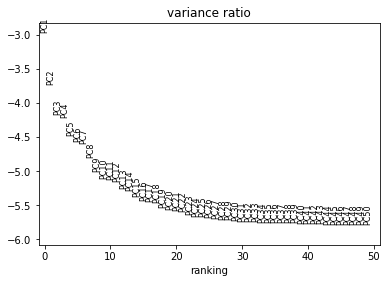

In [53]:
# Run PCA
sc.tl.pca(bdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs = 50)

In [54]:
# Correcting the PCs with harmonypy
sc.external.pp.harmony_integrate(bdata, 'sample_id', adjusted_basis = 'X_pca')
# Computing the neighborhood graph
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs=30)
# Embedding the neighborhood graph
sc.tl.umap(bdata, min_dist = 0.3)

2021-12-08 11:38:13,754 - harmonypy - INFO - Iteration 1 of 10
2021-12-08 11:40:16,827 - harmonypy - INFO - Iteration 2 of 10
2021-12-08 11:42:14,368 - harmonypy - INFO - Iteration 3 of 10
2021-12-08 11:44:14,210 - harmonypy - INFO - Iteration 4 of 10
2021-12-08 11:45:45,048 - harmonypy - INFO - Iteration 5 of 10
2021-12-08 11:47:19,015 - harmonypy - INFO - Iteration 6 of 10
2021-12-08 11:48:43,427 - harmonypy - INFO - Iteration 7 of 10
2021-12-08 11:50:10,919 - harmonypy - INFO - Converged after 7 iterations


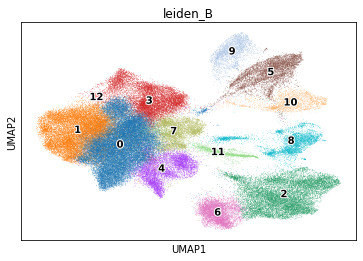

In [55]:
sc.tl.leiden(bdata, key_added = 'leiden_B', resolution = .5)
sc.pl.umap(bdata, color = 'leiden_B', legend_loc = 'on data', legend_fontoutline = 2)

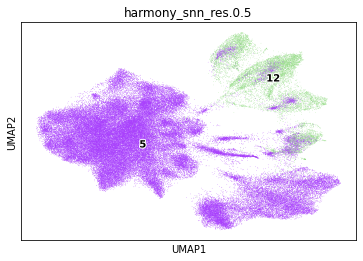

In [56]:
sc.pl.umap(bdata, color = 'harmony_snn_res.0.5', legend_loc = 'on data', legend_fontoutline = 2)

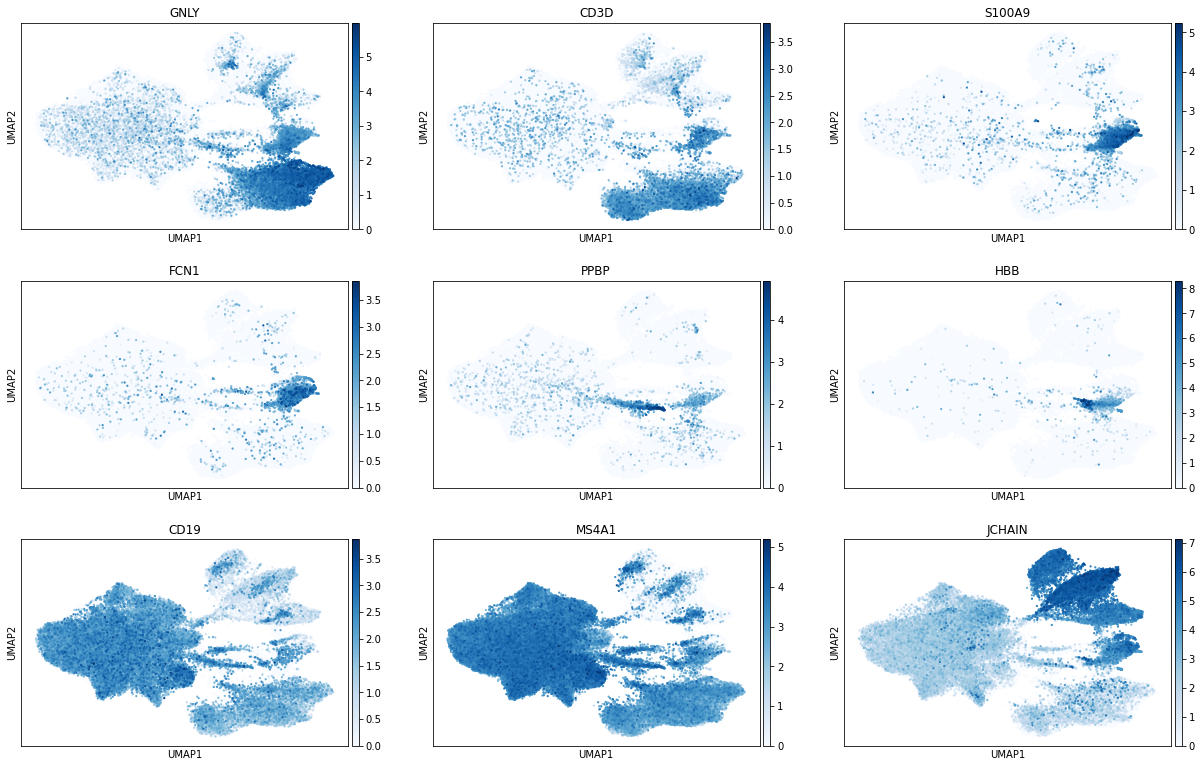

In [57]:
sc.pl.umap(bdata, color=['GNLY', 'CD3D', 'S100A9', 'FCN1', 'PPBP', 'HBB', 'CD19', 'MS4A1', 'JCHAIN'], color_map = 'Blues', size = 20, ncols = 3)

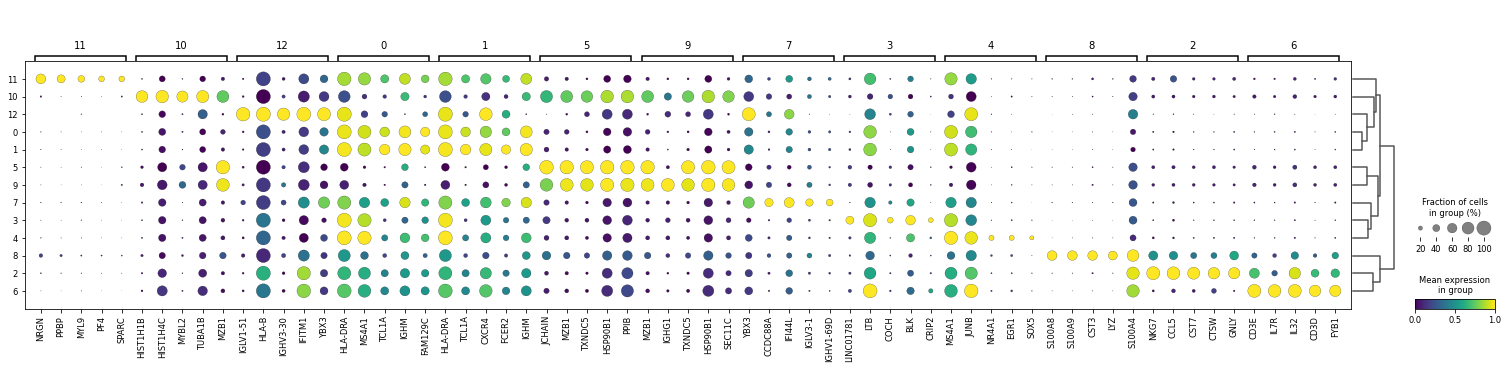

In [58]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_B')
sc.pl.rank_genes_groups_dotplot(bdata, min_logfoldchange =1, n_genes=5, standard_scale = 'var',  color_map = 'viridis')

... storing 'initial_cluster_B' as categorical


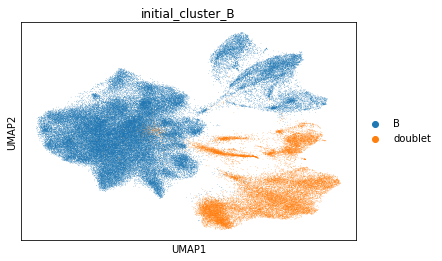

In [60]:
new_dict = {'0':'B',
'1':'B',
'2':'doublet',
'3':'B',
'4':'B',
'5':'B',
'6':'doublet',
'7':'B',
'8':'doublet',
'9':'B',
'10':'B',
'11':'doublet',
'12':'B',}
bdata.obs['initial_cluster_B'] = [new_dict[x] for x in bdata.obs['leiden_B']]
sc.pl.umap(bdata, color = 'initial_cluster_B')

In [61]:
# update the original object's labels too
adata.obs['initial_cluster_B'] = pd.Series(bdata.obs['initial_cluster_B'].astype('object'))

### repeat filtering

In [62]:
# subset to B cell looking clusters
bdata = adata[adata.obs['initial_cluster_B'].isin(['B'])].copy()
bdata

AnnData object with n_obs × n_vars = 84288 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartme

In [63]:
bdata.var['mt'] = bdata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(bdata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

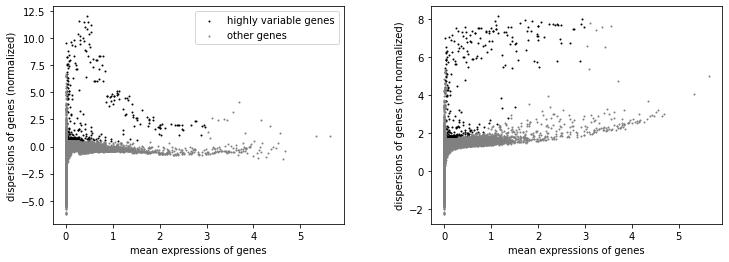

In [64]:
# find highly variable genes
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

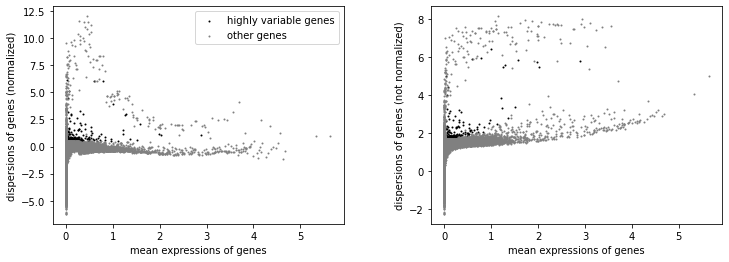

In [65]:
# remove vdj and light chain constant genes from highly variable genes, and also the viral reads
import re
for i in bdata.var.index:
    if re.search('^IG[HKL][VDJC]|VIRAL', i):
        bdata.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(bdata)

In [66]:
# transfer to .raw slot
bdata.raw = bdata

In [67]:
# Filter the rna genes to only those marked as highly-variable
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 84288 × 348
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [68]:
# Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.
sc.pp.regress_out(bdata, ['nCount_RNA', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

... storing 'initial_cluster_B' as categorical


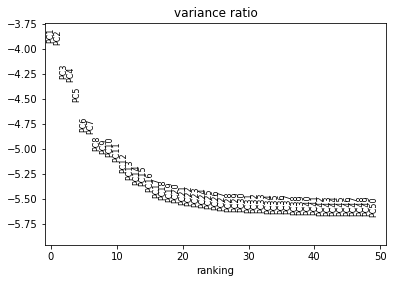

In [69]:
# Run PCA
sc.tl.pca(bdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs = 50)

In [70]:
# Correcting the PCs with harmonypy
sc.external.pp.harmony_integrate(bdata, 'sample_id', adjusted_basis = 'X_pca')
# Computing the neighborhood graph
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs=30)
# Embedding the neighborhood graph
sc.tl.umap(bdata, min_dist = 0.3)

2021-12-08 11:58:54,397 - harmonypy - INFO - Iteration 1 of 10
2021-12-08 12:00:19,000 - harmonypy - INFO - Iteration 2 of 10
2021-12-08 12:01:43,152 - harmonypy - INFO - Converged after 2 iterations


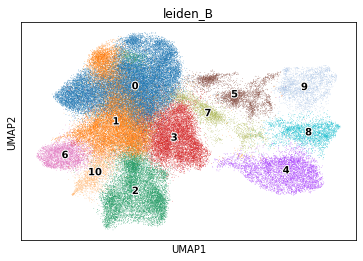

In [71]:
sc.tl.leiden(bdata, key_added = 'leiden_B', resolution = .5)
sc.pl.umap(bdata, color = 'leiden_B', legend_loc = 'on data', legend_fontoutline = 2)

In [118]:
# sc.pl.umap(bdata, color = 'harmony_snn_res.0.5', legend_loc = 'on data', legend_fontoutline = 2)

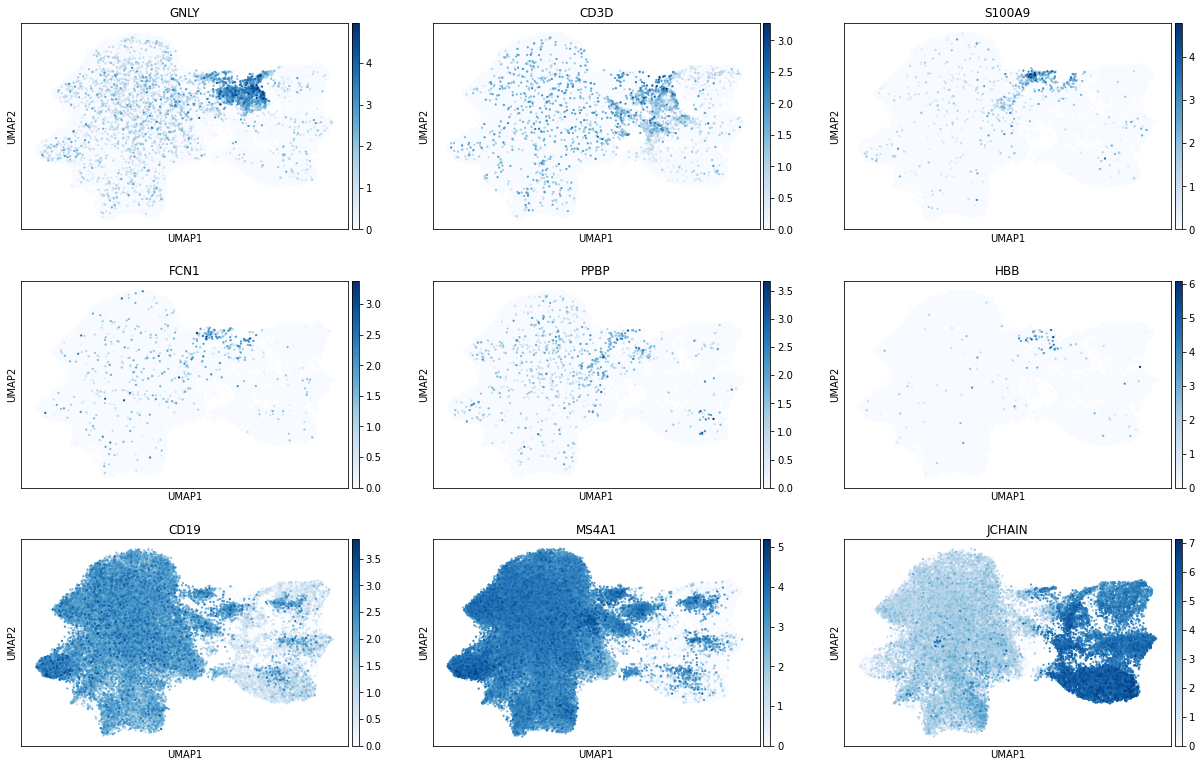

In [73]:
sc.pl.umap(bdata, color=['GNLY', 'CD3D', 'S100A9', 'FCN1', 'PPBP', 'HBB', 'CD19', 'MS4A1', 'JCHAIN'], color_map = 'Blues', size = 20, ncols = 3)

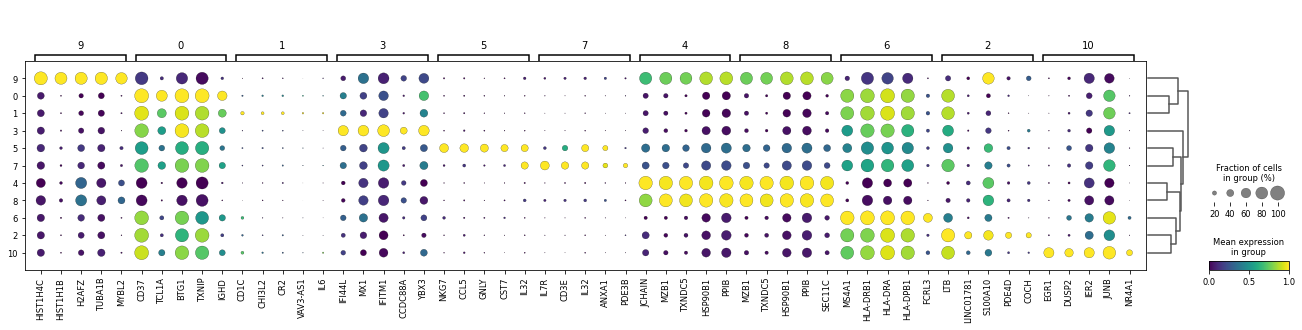

In [74]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_B')
sc.pl.rank_genes_groups_dotplot(bdata, min_logfoldchange =1, n_genes=5, standard_scale = 'var',  color_map = 'viridis')

... storing 'initial_cluster_B' as categorical


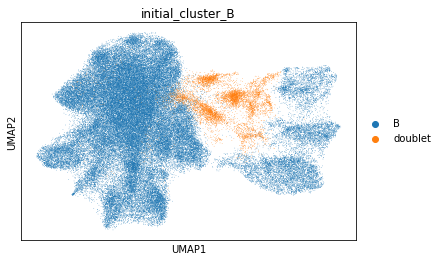

In [75]:
new_dict = {'0':'B',
'1':'B',
'2':'B',
'3':'B',
'4':'B',
'5':'doublet',
'6':'B',
'7':'doublet',
'8':'B',
'9':'B',
'10':'B',}
bdata.obs['initial_cluster_B'] = [new_dict[x] for x in bdata.obs['leiden_B']]
sc.pl.umap(bdata, color = 'initial_cluster_B')

... storing 'initial_cluster_B' as categorical


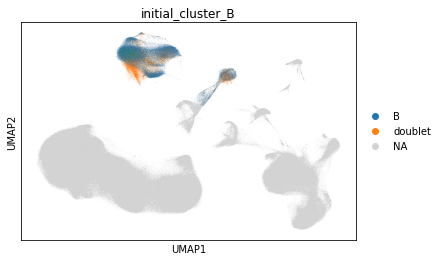

In [76]:
# update the original object's labels too
adata.obs['initial_cluster_B'] = adata.obs['initial_cluster_B'].astype('object')
adata.obs['initial_cluster_B'].update(pd.Series(bdata.obs['initial_cluster_B'].astype('object')))
sc.pl.umap(adata, color = 'initial_cluster_B')

### repeat filtering

In [77]:
# subset to B cell looking clusters
bdata = adata[adata.obs['initial_cluster_B'].isin(['B'])].copy()
bdata

AnnData object with n_obs × n_vars = 77499 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartme

In [78]:
bdata.var['mt'] = bdata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(bdata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

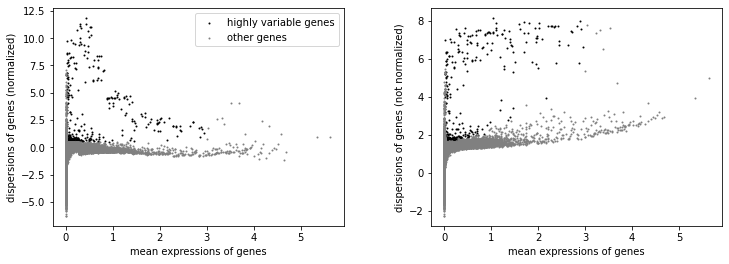

In [79]:
# find highly variable genes
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

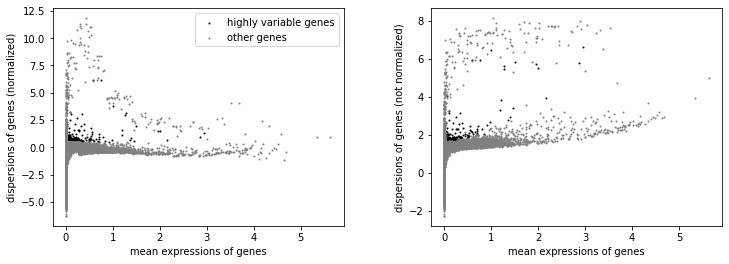

In [80]:
# remove vdj and light chain constant genes from highly variable genes, and also the viral reads
import re
for i in bdata.var.index:
    if re.search('^IG[HKL][VDJC]|VIRAL', i):
        bdata.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(bdata)

In [81]:
# transfer to .raw slot
bdata.raw = bdata

In [82]:
# Filter the rna genes to only those marked as highly-variable
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 77499 × 372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [83]:
# Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.
sc.pp.regress_out(bdata, ['nCount_RNA', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

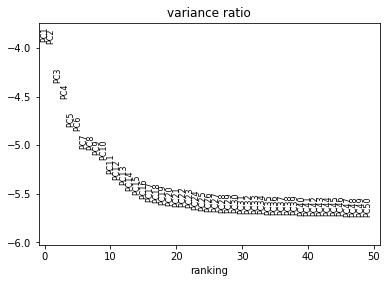

In [84]:
# Run PCA
sc.tl.pca(bdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs = 50)

In [85]:
# Correcting the PCs with harmonypy
sc.external.pp.harmony_integrate(bdata, 'sample_id', adjusted_basis = 'X_pca')
# Computing the neighborhood graph
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs=30)
# Embedding the neighborhood graph
sc.tl.umap(bdata, min_dist = 0.3)

2021-12-08 12:07:05,907 - harmonypy - INFO - Iteration 1 of 10
2021-12-08 12:08:22,195 - harmonypy - INFO - Iteration 2 of 10
2021-12-08 12:09:38,569 - harmonypy - INFO - Converged after 2 iterations


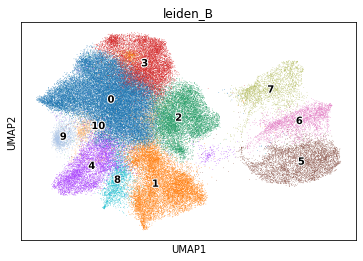

In [86]:
sc.tl.leiden(bdata, key_added = 'leiden_B', resolution = .5)
sc.pl.umap(bdata, color = 'leiden_B', legend_loc = 'on data', legend_fontoutline = 2)

In [117]:
# sc.pl.umap(bdata, color = 'harmony_snn_res.0.5', legend_loc = 'on data', legend_fontoutline = 2)

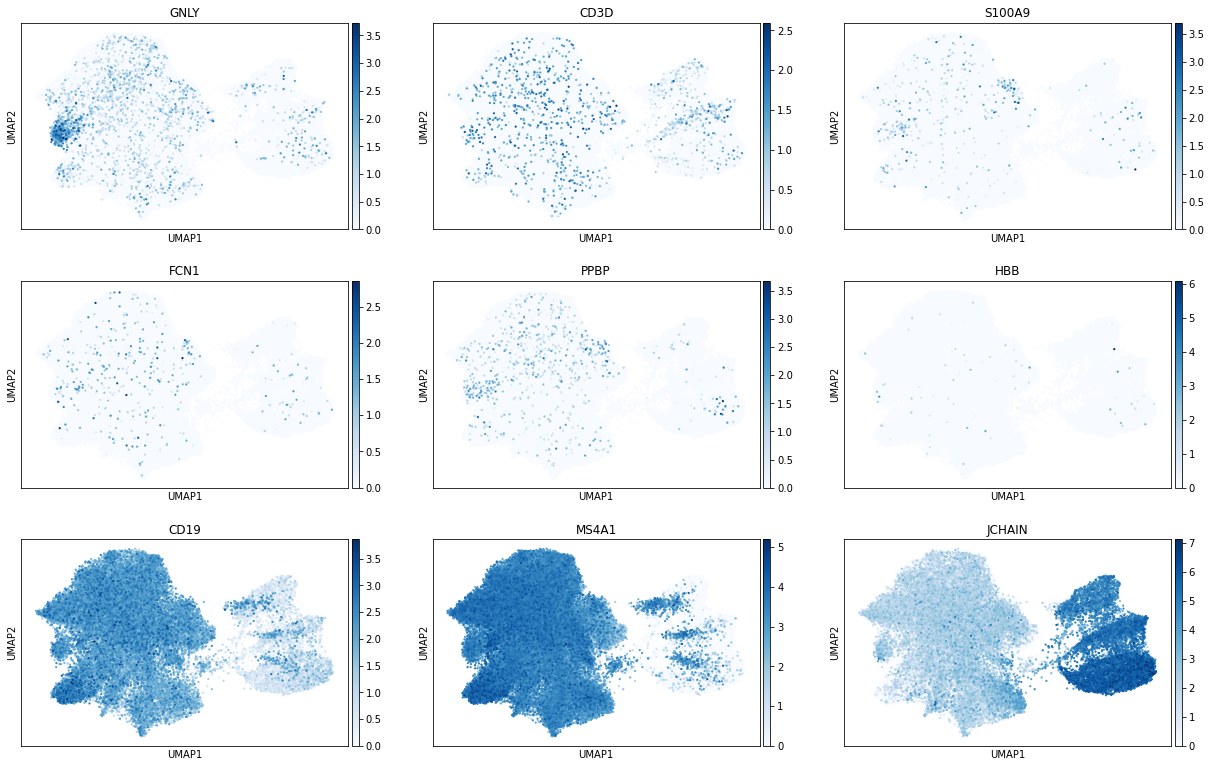

In [88]:
sc.pl.umap(bdata, color=['GNLY', 'CD3D', 'S100A9', 'FCN1', 'PPBP', 'HBB', 'CD19', 'MS4A1', 'JCHAIN'], color_map = 'Blues', size = 20, ncols = 3)

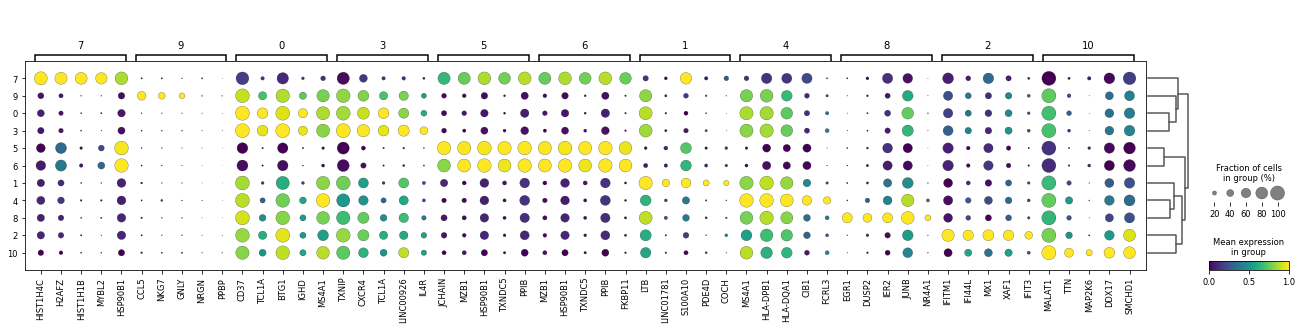

In [89]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_B')
sc.pl.rank_genes_groups_dotplot(bdata, min_logfoldchange =1, n_genes=5, standard_scale = 'var',  color_map = 'viridis')

... storing 'initial_cluster_B' as categorical


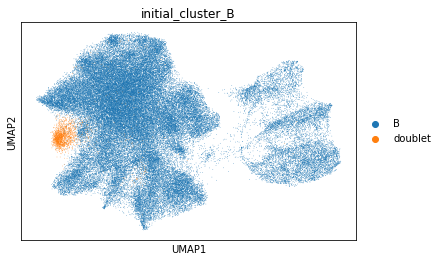

In [90]:
new_dict = {'0':'B',
'1':'B',
'2':'B',
'3':'B',
'4':'B',
'5':'B',
'6':'B',
'7':'B',
'8':'B',
'9':'doublet',
'10':'B',}
bdata.obs['initial_cluster_B'] = [new_dict[x] for x in bdata.obs['leiden_B']]
sc.pl.umap(bdata, color = 'initial_cluster_B')

... storing 'initial_cluster_B' as categorical


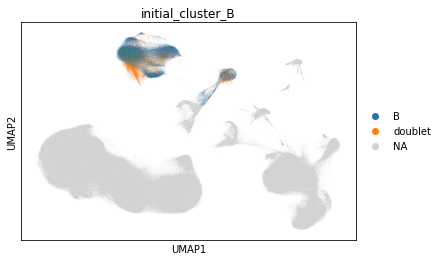

In [91]:
# update the original object's labels too
adata.obs['initial_cluster_B'] = adata.obs['initial_cluster_B'].astype('object')
adata.obs['initial_cluster_B'].update(pd.Series(bdata.obs['initial_cluster_B'].astype('object')))
sc.pl.umap(adata, color = 'initial_cluster_B')

### repeat filtering

In [92]:
# subset to B cell looking clusters
bdata = adata[adata.obs['initial_cluster_B'].isin(['B'])].copy()
bdata

AnnData object with n_obs × n_vars = 75683 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartme

In [93]:
bdata.var['mt'] = bdata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(bdata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

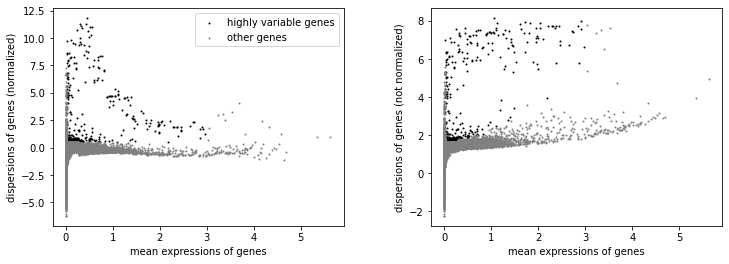

In [94]:
# find highly variable genes
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

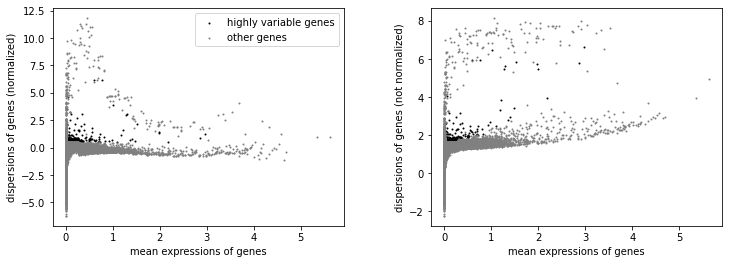

In [95]:
# remove vdj and light chain constant genes from highly variable genes, and also the viral reads
import re
for i in bdata.var.index:
    if re.search('^IG[HKL][VDJC]|VIRAL', i):
        bdata.var.at[i, 'highly_variable'] = False
sc.pl.highly_variable_genes(bdata)

In [96]:
# transfer to .raw slot
bdata.raw = bdata

In [97]:
# Filter the rna genes to only those marked as highly-variable
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 75683 × 385
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

In [98]:
# Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.
sc.pp.regress_out(bdata, ['nCount_RNA', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

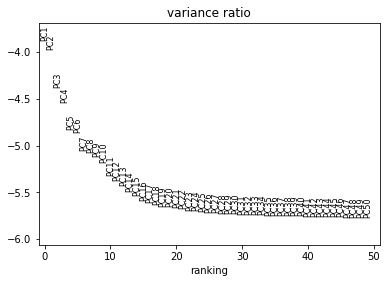

In [99]:
# Run PCA
sc.tl.pca(bdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs = 50)

In [130]:
# Correcting the PCs with harmonypy
# sc.external.pp.harmony_integrate(bdata, 'sample_id', adjusted_basis = 'X_pca')
# Computing the neighborhood graph
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs=30)
# Embedding the neighborhood graph
sc.tl.umap(bdata, min_dist = 0.3)

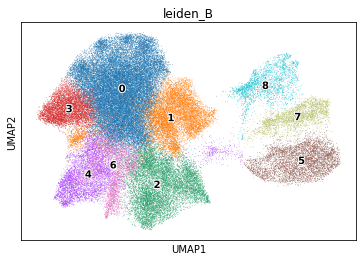

In [131]:
sc.tl.leiden(bdata, key_added = 'leiden_B', resolution = .5)
sc.pl.umap(bdata, color = 'leiden_B', legend_loc = 'on data', legend_fontoutline = 2)

In [134]:
bdata

AnnData object with n_obs × n_vars = 75683 × 385
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_compartment

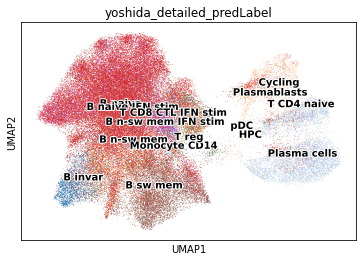

In [136]:
sc.pl.umap(bdata, color = 'yoshida_detailed_predLabel', legend_loc = 'on data', legend_fontoutline = 2)

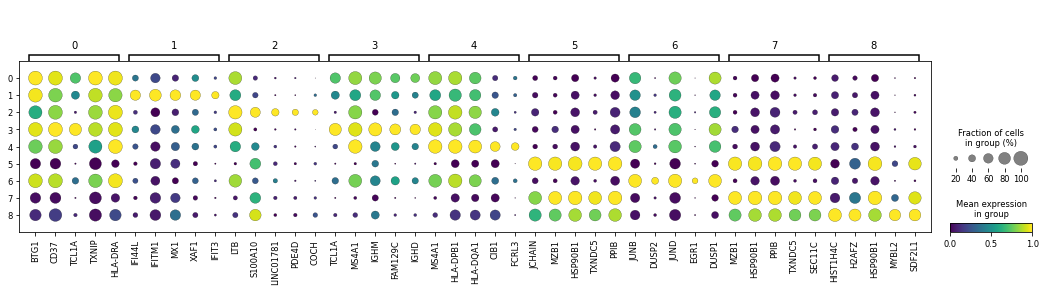

In [123]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden_B')
sc.pl.rank_genes_groups_dotplot(bdata, min_logfoldchange =1, n_genes=5, standard_scale = 'var',  color_map = 'viridis', dendrogram = False)

In [137]:
# B cell gene set tests
df1 = pd.read_csv('../newcastle_covid/datasets/GSE22886_BcellGenesets.txt', sep = '\t', index_col = None, header = 0, na_filter=None)
df2 = pd.read_csv('../newcastle_covid/datasets/GSE38697_GSE12845_BcellGenesets.txt', sep = '\t', index_col = None, header = 0, na_filter=None)
df3 = pd.read_csv('../newcastle_covid/datasets/Bcell_genesets.txt', sep='\t', header=0, index_col = None, na_filter=False)
df4 = pd.read_csv('../newcastle_covid/datasets/Monaco B cells.txt', sep='\t', header=0, index_col = None, na_filter=False)
df5 = pd.read_csv('../newcastle_covid/datasets/GSE17186_transitionalBcells.txt', sep='\t', header=0, index_col = None, na_filter=False)
df6 = pd.read_csv('../newcastle_covid/datasets/GSE12845_preGC_BcellGenesets.txt', sep='\t', header=0, index_col = None, na_filter=False)

In [138]:
def geneset_score(self, genesets, groupby, figsize=(3, 4), cmap = 'viridis', col_cluster = True, row_cluster = True):
    import numpy as np
    import seaborn as sns
    for s in genesets:
        sc.tl.score_genes(self, [y for y in genesets[s] if y != ''], use_raw = True, score_name= str(s)+'_score')
    # calculate average enrichment score
    list1 = list(set(self.obs[groupby]))
    subset = self.obs[[groupby] + [str(s)+'_score' for s in genesets]]
    output = pd.DataFrame()
    for x in list1:
        subsetX = subset[subset[groupby] == x]
        outdict = {}
        for k in [str(s)+'_score' for s in genesets]:
            out = {k:np.mean(subsetX[k])}
            outdict.update(out)
        output = output.append(outdict, ignore_index=True)
    output.index = list1
    output = output[[str(s)+'_score' for s in genesets]]
    g = sns.clustermap(output.transpose(), standard_scale = 0, cmap=cmap, figsize=figsize, col_cluster = col_cluster, row_cluster = row_cluster)
    sc.pl.umap(self, color = [str(s)+'_score' for s in genesets], size = 10, ncols = 2)
    print(g)

In [139]:
tmp = bdata.copy()

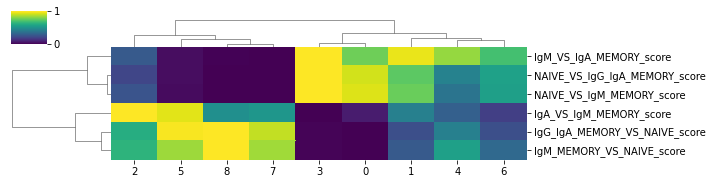

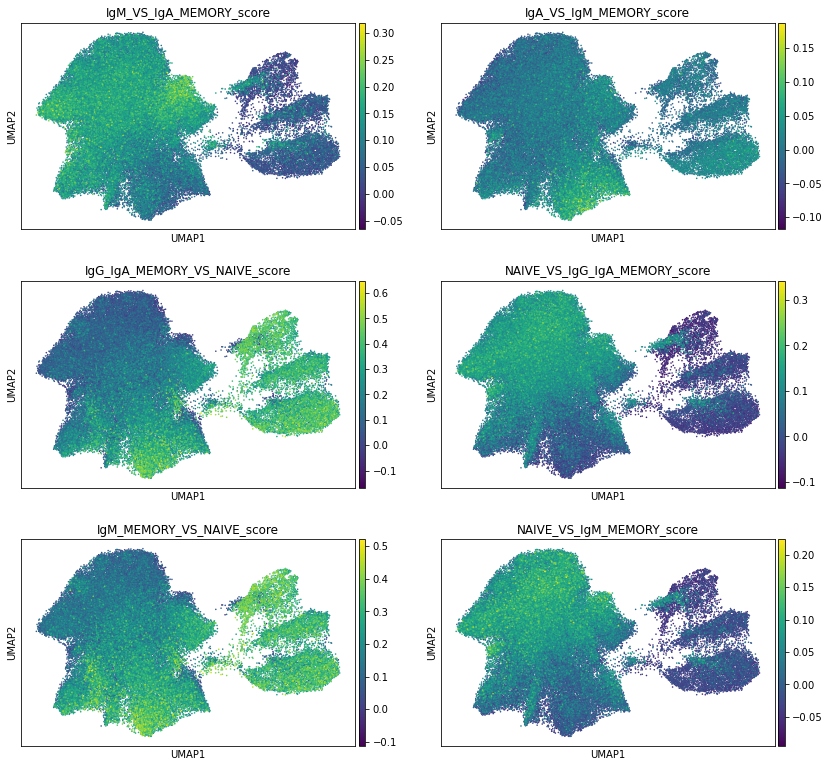

In [140]:
geneset_score(tmp, df1, 'leiden_B', (10,2.5))

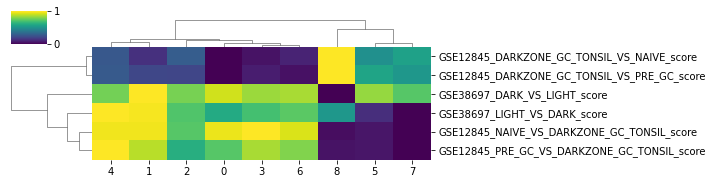

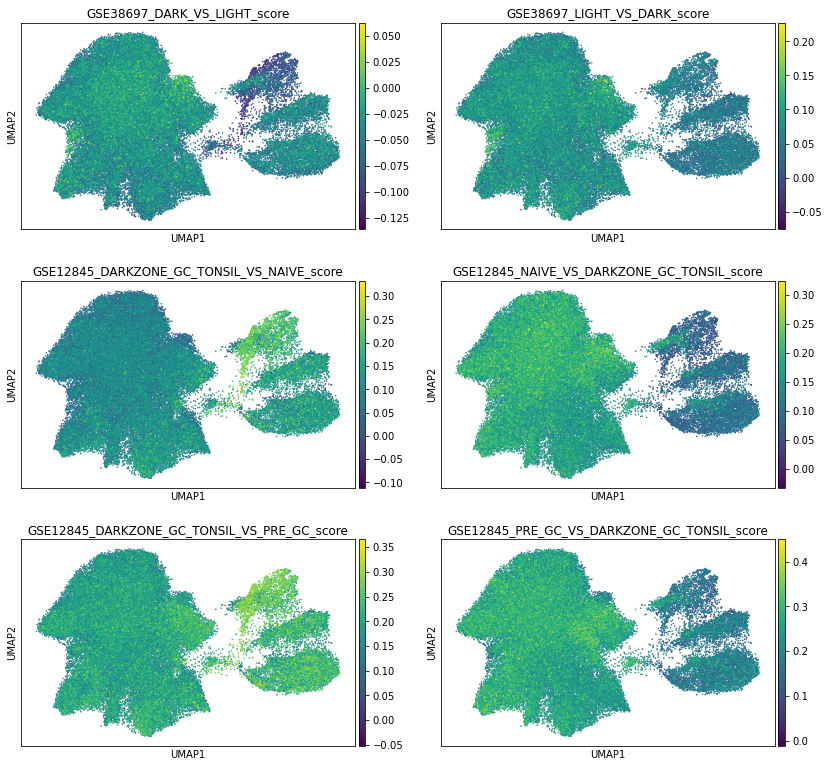

In [141]:
geneset_score(tmp, df2, 'leiden_B', (10,2.5))

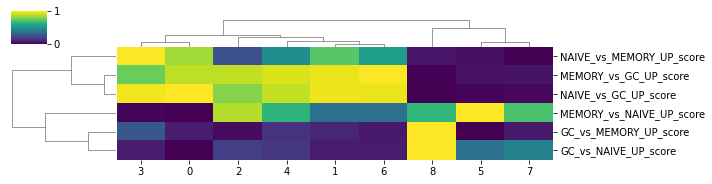

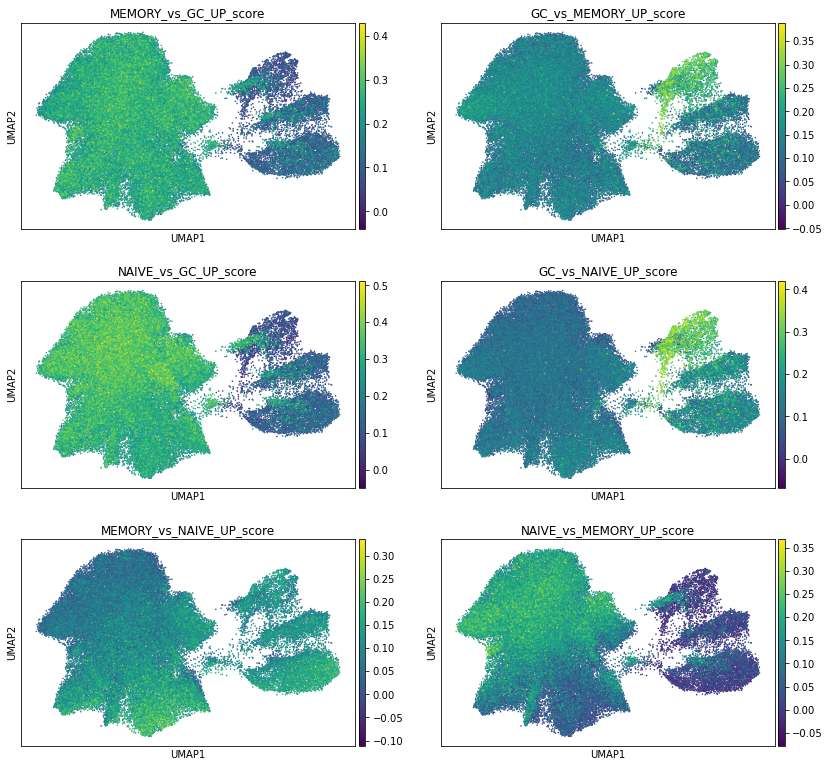

In [142]:
geneset_score(tmp, df3, 'leiden_B', (10,2.5))

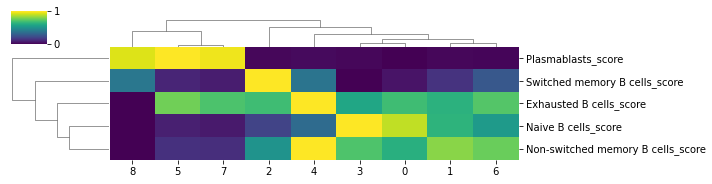

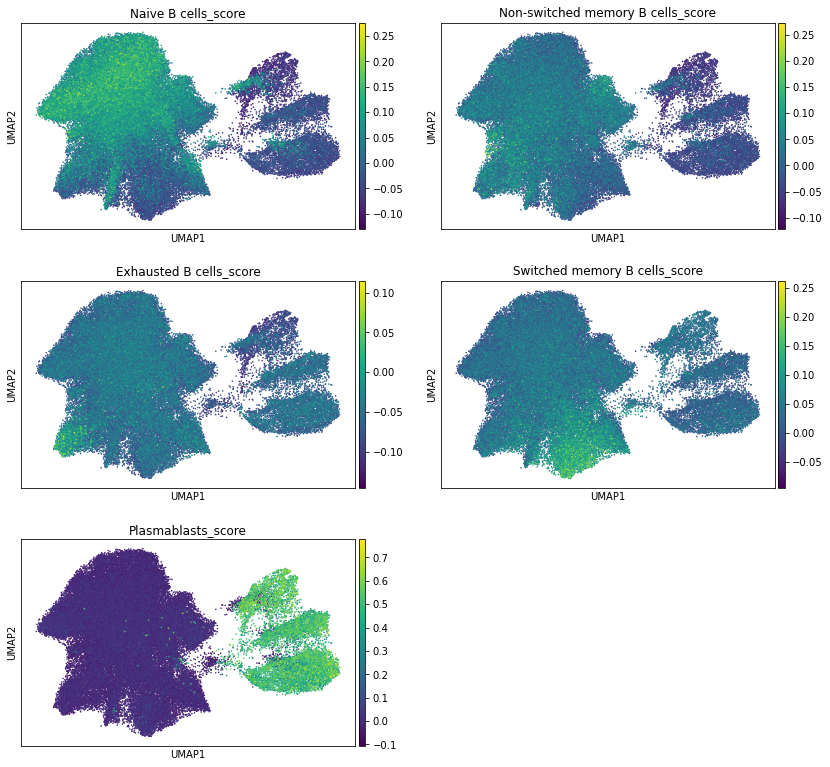

In [143]:
geneset_score(tmp, df4, 'leiden_B', (10,2.5))

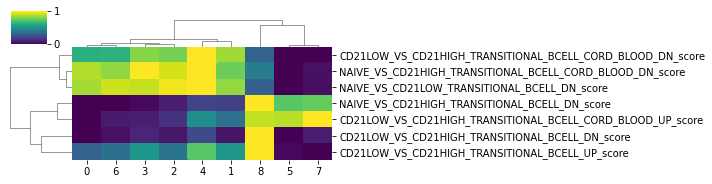

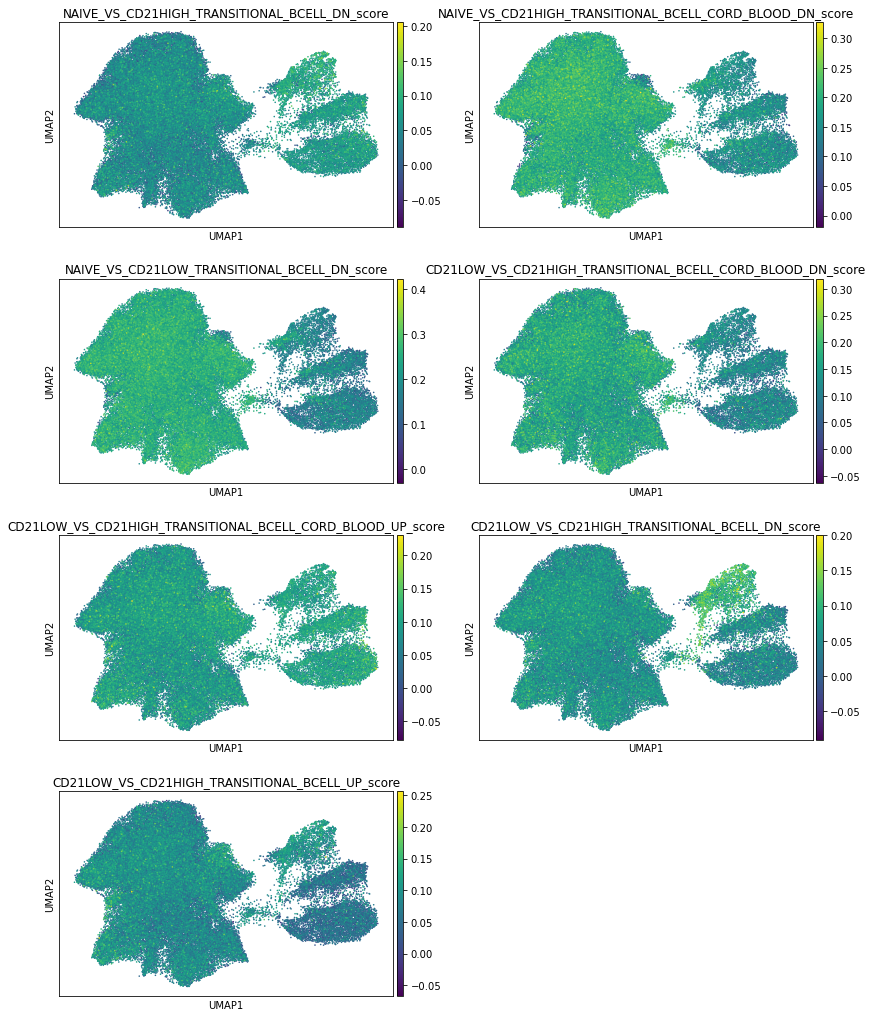

In [144]:
geneset_score(tmp, df5, 'leiden_B', (10,2.5))

In [145]:
# save first
bdata.write_h5ad('h5ad/df.fil3_gex_bcells.h5ad', compression = 'gzip')

In [146]:
adata.write_h5ad('h5ad/df.fil3_gex_kt.h5ad', compression = 'gzip')